## `MeshArrays.jl` test suite uses a global smoother function

Load the `MeshArrays.jl` and `Plots.jl` package modules

In [1]:
using MeshArrays, Plots

In [2]:
#for backward compatibility:
!isdefined(MeshArrays,:GridSpec) ? GridSpec=GCMGridSpec : nothing
!isdefined(MeshArrays,:GridLoad) ? GridLoad=GCMGridLoad : nothing
!isdefined(MeshArrays,:GridOfOnes) ? GridOfOnes=GCMGridOnes : nothing

GCMGridOnes (generic function with 1 method)

Define a grid with `6` faces of `16*16` points and distances, areas, etc. all set to `1.0`:

In [3]:
GridVariables=GridOfOnes("cs",6,16);

Smooth a randomly initialized `Rini` at 3 grid point scales (`DXCsm,DYCsm`):

In [4]:
(Rini,Rend,DXCsm,DYCsm)=MeshArrays.demo2(GridVariables);

Define `qwckplot` and use it to vizualize the resulting `Rend`:

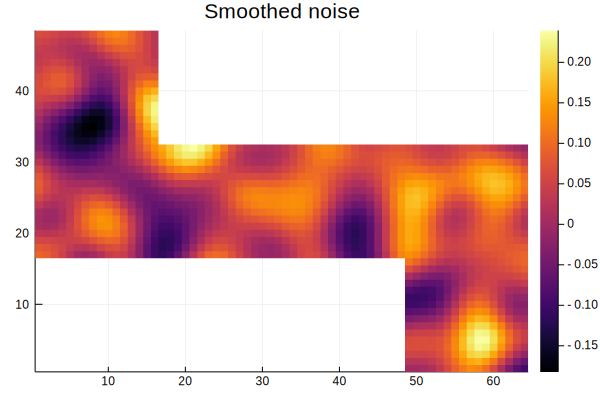

In [5]:
include(joinpath(dirname(pathof(MeshArrays)),"gcmfaces_convert.jl"))
include(joinpath(dirname(pathof(MeshArrays)),"gcmfaces_plot.jl"))

qwckplot(Rend,"Smoothed noise")

Note the increased smoothness and reduced magnitude as compared with `Rini`:

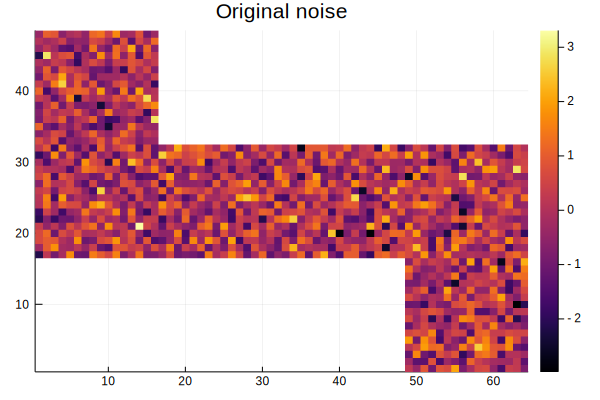

In [6]:
qwckplot(Rini,"Original noise")

To finish, let's benchmark `smooth` as a function of smoothing scale parameters:

In [7]:
@time Rend=smooth(Rini,DXCsm,DYCsm,GridVariables);
@time Rend=smooth(Rini,2DXCsm,2DYCsm,GridVariables);

  0.013115 seconds (8.21 k allocations: 6.797 MiB, 74.62% gc time)
  0.019400 seconds (30.69 k allocations: 24.272 MiB, 52.61% gc time)
